In [1]:
# 1️⃣ Install and import libraries (Colab: run this first)
!pip install scikit-learn --quiet

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# 2️⃣ Load your datasets (upload in Colab and use these names)
songs = pd.read_csv("data.csv")               # main track-level data
by_year = pd.read_csv("data_by_year.csv")     # aggregated by year
by_genre = pd.read_csv("data_by_genres.csv")  # aggregated by genre

songs.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
# Keep a clean copy
cols_to_keep = [
    "name", "artists", "id", "year", "popularity", "duration_ms",
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo", "valence",
    "mode", "key", "explicit"
]

songs_small = songs[cols_to_keep].dropna().drop_duplicates(subset=["id"]).reset_index(drop=True)
songs_small.head()


,name,artists,id,year,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,explicit
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",4BJqT0PrAfrxzMOxytFOIz,1921,4,831667,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954,0.0594,1,10,0
1,Clancy Lowered the Boom,['Dennis Day'],7xPhfUan2yNtyFG0cUWkt8,1921,5,180533,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936,0.9630,1,7,0
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1o6I8BglA6ylDMrIELygv1,1921,5,500062,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339,0.0394,1,3,0
3,Danny Boy,['Frank Parker'],3ftBPsC5vPBKxYSee08FDH,1921,3,210000,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109,0.1650,1,5,0
4,When Irish Eyes Are Smiling,['Phil Regan'],4d6HGyGT8e121BsdKmw9v6,1921,2,166693,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665,0.2530,1,3,0


In [4]:
feature_cols = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo", "valence"
]

X = songs_small[feature_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Build similarity model
knn_model = NearestNeighbors(metric="cosine", algorithm="brute")
knn_model.fit(X_scaled)


NearestNeighbors(algorithm='brute', metric='cosine')

In [6]:
def search_song(query, n_results=5):
    mask = songs_small["name"].str.contains(query, case=False, na=False)
    results = songs_small[mask].head(n_results)
    if results.empty:
        print("No songs found with that query.")
    else:
        display(results[["name", "artists", "year", "popularity"]])
    return results


In [7]:
search_song("Shape of You")


,name,artists,year,popularity
19074,Shape of You,['Ed Sheeran'],2017,85
74616,Shape of You,['Ed Sheeran'],2017,73


,name,artists,id,year,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,explicit
19074,Shape of You,['Ed Sheeran'],7qiZfU4dY1lWllzX7mPBI3,2017,85,233713,0.581,0.825,0.652,0.0,0.0931,-3.183,0.0802,95.977,0.931,0,1,0
74616,Shape of You,['Ed Sheeran'],0FE9t6xYkqWXU2ahLh6D8X,2017,73,233713,0.581,0.825,0.652,0.0,0.0931,-3.183,0.0802,95.977,0.931,0,1,0


In [8]:
def recommend_similar_songs(song_name, n_recommendations=10):
    # find first match
    matches = songs_small[songs_small["name"].str.contains(song_name, case=False, na=False)]
    if matches.empty:
        print("❌ Song not found. Try another name or use search_song().")
        return

    # Just use the first match
    idx = matches.index[0]
    song_vector = X_scaled[idx].reshape(1, -1)

    distances, indices = knn_model.kneighbors(song_vector, n_neighbors=n_recommendations + 1)

    print(f"\n🎵 Input song: {songs_small.loc[idx, 'name']} — {songs_small.loc[idx, 'artists']}\n")
    print("Recommended similar songs:\n")

    for dist, ind in zip(distances[0][1:], indices[0][1:]):  # skip the first (itself)
        row = songs_small.loc[ind]
        sim_score = 1 - dist  # cosine similarity = 1 - distance
        print(f"- {row['name']} — {row['artists']} | year: {row['year']} | sim: {sim_score:.3f}")


In [9]:
recommend_similar_songs("Shape of You", n_recommendations=10)



🎵 Input song: Shape of You — ['Ed Sheeran']

Recommended similar songs:

- Shape of You — ['Ed Sheeran'] | year: 2017 | sim: 1.000
- Que Te Vaya Bien — ['Grupo Jalado'] | year: 2017 | sim: 0.990
- Gripa Colombiana — ['Los Tucanes De Tijuana'] | year: 2000 | sim: 0.990
- Tu Defecto — ['Los Creadorez Del Pasito Duranguense'] | year: 2009 | sim: 0.986
- La Suerte del Señor — ['El Fantasma', 'Los Dos Carnales'] | year: 2019 | sim: 0.985
- Hasta El Día De Hoy — ['Los Dareyes De La Sierra'] | year: 2008 | sim: 0.985
- Lupe Campos — ['El Fantasma', 'Los Dos Carnales'] | year: 2019 | sim: 0.984
- Brujeria — ['El Gran Combo De Puerto Rico'] | year: 1979 | sim: 0.984
- El Comando del Diablo — ['Noel Torres', 'Gerardo Ortiz'] | year: 2014 | sim: 0.983
- Goyito Sabater — ['El Gran Combo De Puerto Rico'] | year: 1982 | sim: 0.983


In [10]:
def get_song_vector_by_name(song_name):
    matches = songs_small[songs_small["name"].str.contains(song_name, case=False, na=False)]
    if matches.empty:
        print(f"No match for: {song_name}")
        return None
    idx = matches.index[0]
    return X_scaled[idx], idx, matches.iloc[0]

def recommend_for_user(favourite_songs, n_recommendations=15):
    vectors = []
    indices_used = []

    for s in favourite_songs:
        result = get_song_vector_by_name(s)
        if result is not None:
            vec, idx, row = result
            vectors.append(vec)
            indices_used.append(idx)
            print(f"✔ Using: {row['name']} — {row['artists']}")

    if not vectors:
        print("No valid songs given.")
        return

    user_vec = np.mean(vectors, axis=0).reshape(1, -1)

    distances, indices = knn_model.kneighbors(user_vec, n_neighbors=n_recommendations + len(indices_used))

    print("\n🎧 User-based recommendations (based on your liked songs):\n")

    count = 0
    for dist, ind in zip(distances[0], indices[0]):
        if ind in indices_used:
            continue  # skip songs already liked
        row = songs_small.loc[ind]
        sim_score = 1 - dist
        print(f"- {row['name']} — {row['artists']} | year: {row['year']} | sim: {sim_score:.3f}")
        count += 1
        if count >= n_recommendations:
            break


In [11]:
favorite_list = ["Shape of You", "Blinding Lights", "Someone Like You"]
recommend_for_user(favorite_list, n_recommendations=10)


✔ Using: Shape of You — ['Ed Sheeran']
✔ Using: Blinding Lights — ['The Weeknd']
✔ Using: Someone Like You — ['Buddy Clark', 'Doris Day']

🎧 User-based recommendations (based on your liked songs):

- The Man With All The Toys - 1991 Remix — ['The Beach Boys', 'Mark Linett', 'Sweet'] | year: 1964 | sim: 0.984
- Gorilla — ['Bruno Mars'] | year: 2012 | sim: 0.981
- Rudolph The Red-Nosed Reindeer — ['Kidsongs'] | year: 1993 | sim: 0.973
- Lo Intentamos — ['Espinoza Paz'] | year: 2009 | sim: 0.973
- play this when i'm gone — ['Machine Gun Kelly'] | year: 2020 | sim: 0.967
- Your Love Is King - Remastered — ['Sade'] | year: 2011 | sim: 0.966
- Who Can I Run To — ['Xscape'] | year: 1995 | sim: 0.966
- Y Me Quedé Suspirando — ['Duelo'] | year: 2002 | sim: 0.965
- Para Puerto Rico Voy — ['Joe Bataan'] | year: 1971 | sim: 0.963
- Laundromat - Radio Edit — ['Nivea'] | year: 2002 | sim: 0.963


In [12]:
def compare_two_songs(song1, song2):
    v1 = get_song_vector_by_name(song1)
    v2 = get_song_vector_by_name(song2)

    if v1 is None or v2 is None:
        return

    _, idx1, row1 = v1
    _, idx2, row2 = v2

    # similarity in scaled space
    sim = cosine_similarity(X_scaled[idx1].reshape(1, -1),
                            X_scaled[idx2].reshape(1, -1))[0][0]

    print(f"Song 1: {row1['name']} — {row1['artists']}")
    print(f"Song 2: {row2['name']} — {row2['artists']}")
    print(f"\nCosine similarity: {sim:.3f}\n")

    f1 = songs_small.loc[idx1, feature_cols]
    f2 = songs_small.loc[idx2, feature_cols]

    diff = (f2 - f1).to_frame(name="Song2 - Song1")
    display(pd.concat([f1.rename("Song1"), f2.rename("Song2"), diff], axis=1))


In [13]:
compare_two_songs("Shape of You", "Perfect")


Song 1: Shape of You — ['Ed Sheeran']
Song 2: Practice Makes Perfect - Take 3 — ['Billie Holiday']

Cosine similarity: 0.187



,Song1,Song2,Song2 - Song1
acousticness,0.581,0.885,0.304
danceability,0.825,0.537,-0.288
energy,0.652,0.279,-0.373
instrumentalness,0.0,0.0013,0.0013
liveness,0.0931,0.0358,-0.0573
loudness,-3.183,-9.014,-5.831
speechiness,0.0802,0.0452,-0.035
tempo,95.977,145.604,49.627
valence,0.931,0.607,-0.324


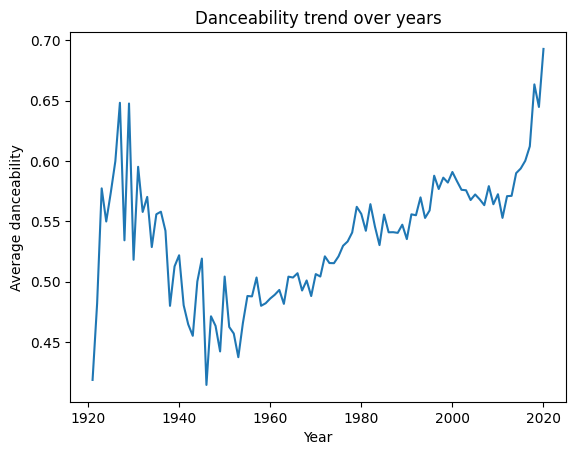

In [14]:
import matplotlib.pyplot as plt

by_year_sorted = by_year.sort_values("year")

plt.figure()
plt.plot(by_year_sorted["year"], by_year_sorted["danceability"])
plt.xlabel("Year")
plt.ylabel("Average danceability")
plt.title("Danceability trend over years")
plt.show()


genres
basshall               80.666667
trap venezolano        80.000000
south african house    80.000000
turkish edm            80.000000
alberta hip hop        78.500000
chinese electropop     78.500000
afroswing              77.312500
indie triste           77.000000
guaracha               77.000000
russian dance          77.000000
Name: popularity, dtype: float64


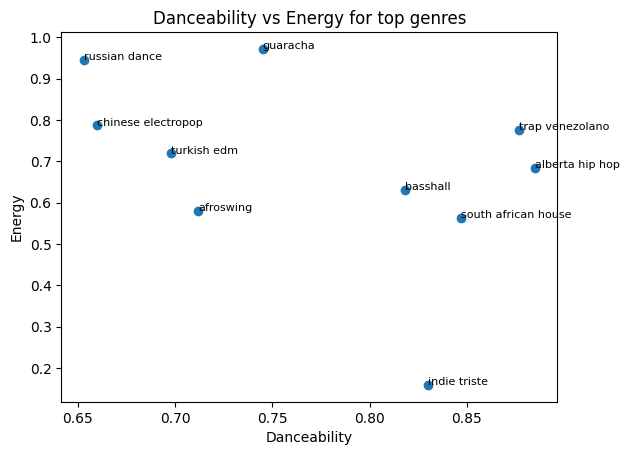

In [15]:
top_genres = by_genre.groupby("genres")["popularity"].mean().sort_values(ascending=False).head(10)
print(top_genres)

# Example: danceability vs energy for top genres
selected = by_genre[by_genre["genres"].isin(top_genres.index)]

plt.figure()
plt.scatter(selected["danceability"], selected["energy"])
for _, row in selected.iterrows():
    plt.text(row["danceability"], row["energy"], row["genres"], fontsize=8)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs Energy for top genres")
plt.show()
